<a href="https://colab.research.google.com/github/HiraZaheer/Python-Projects/blob/main/ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings ('ignore')
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import xgboost as ygb

from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

sns.set()
%matplotlib inline

sales= pd.read_csv("/content/Advertisement.csv")
sales

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [2]:
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
sales.isna().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [4]:
sales.head(10)


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [5]:
sales.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
sales.drop(['Unnamed: 0'],axis=1,inplace=True)
sales


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
sales.duplicated().sum()

0

In [7]:
train_df, validation_df = train_test_split(sales,train_size=0.75, random_state=1)#random_state (every time same data will go in training andd testing)
train_df





,TV,Radio,Newspaper,Sales
98,289.7,42.3,51.2,25.4
123,123.1,34.6,12.4,15.2
119,19.4,16.0,22.3,6.6
53,182.6,46.2,58.7,21.2
33,265.6,20.0,0.3,17.4
...,...,...,...,...
133,219.8,33.5,45.1,19.6
137,273.7,28.9,59.7,20.8
72,26.8,33.0,19.3,8.8
140,73.4,17.0,12.9,10.9


In [ ]:
validation_df

,TV,Radio,Newspaper,Sales
58,210.8,49.6,37.7,23.8
40,202.5,22.3,31.6,16.6
34,95.7,1.4,7.4,9.5
102,280.2,10.1,21.4,14.8
184,253.8,21.3,30.0,17.6
198,283.6,42.0,66.2,25.5
95,163.3,31.6,52.9,16.9
4,180.8,10.8,58.4,12.9
29,70.6,16.0,40.8,10.5
168,215.4,23.6,57.6,17.1


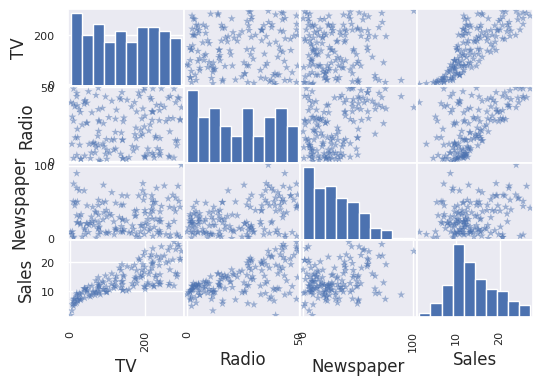

In [ ]:
scatter_matrix(train_df, diagonal='hist',marker='*',cmap='coolwarm',figsize=(6,4))
plt.show()

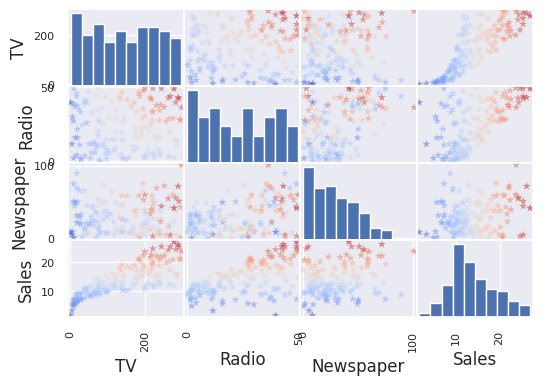

In [ ]:
scatter_matrix(train_df, diagonal='hist',marker='*',c=train_df['Sales'],cmap='coolwarm',figsize=(6,4))
plt.show()

In [ ]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

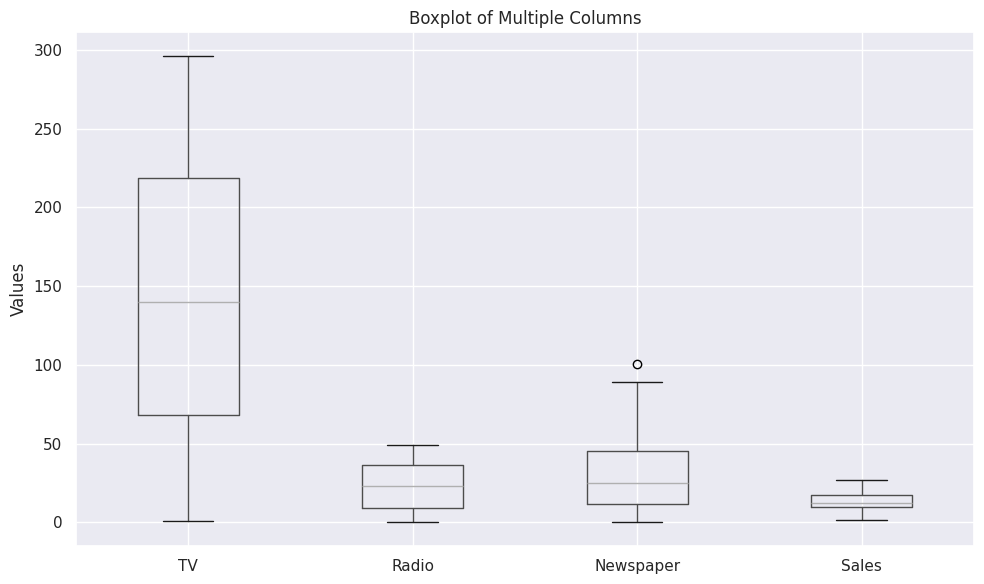

In [8]:
plt.figure(figsize=(10, 6))
train_df.boxplot(column=['TV', 'Radio', 'Newspaper', 'Sales'])  # Replace with your actual column names
plt.title('Boxplot of Multiple Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

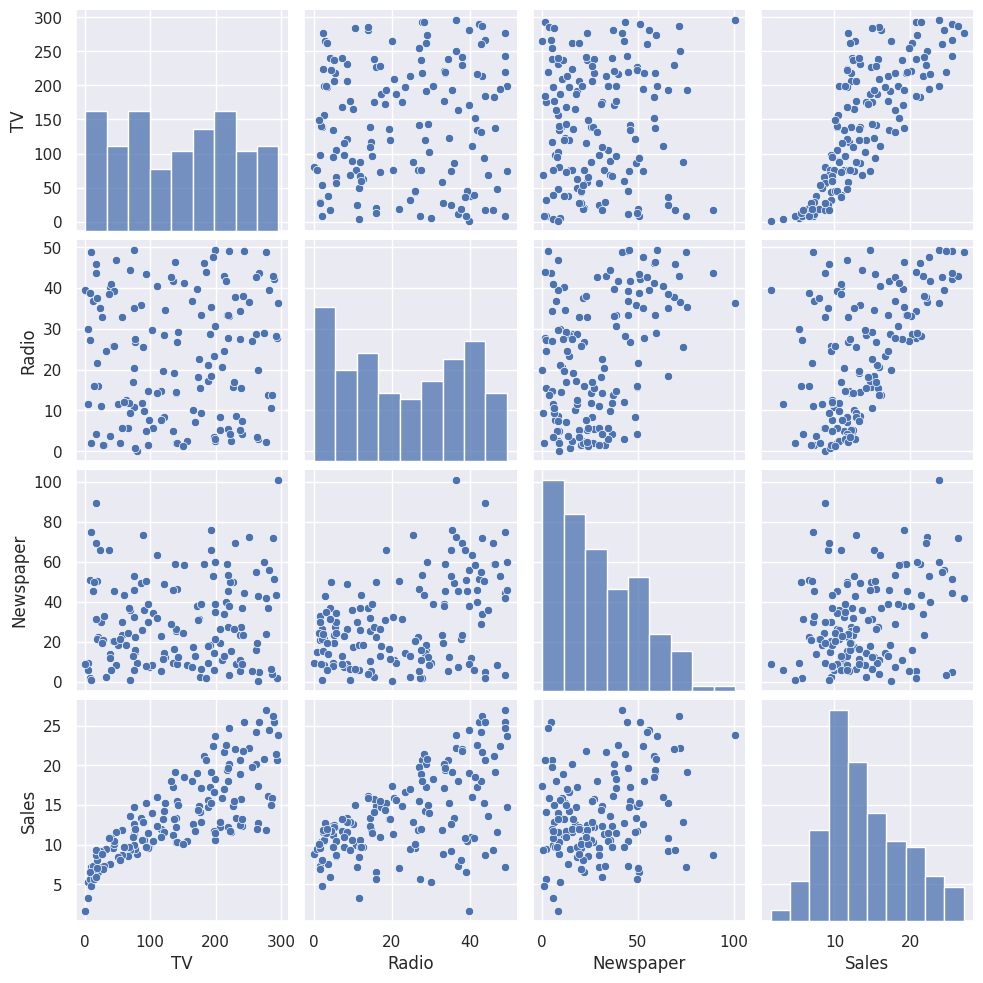

In [ ]:
sns.pairplot (train_df )

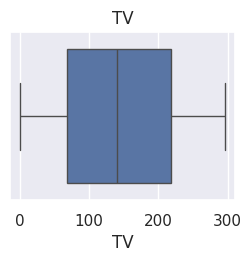

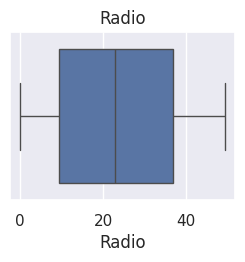

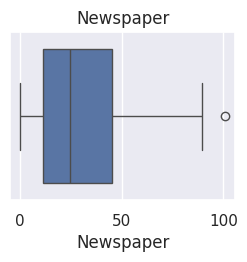

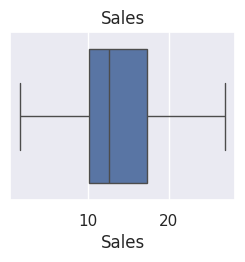

In [ ]:

plt.figure()
for col in train_df.select_dtypes(include= ['number']).columns:
  plt.subplot(2,2,train_df.columns.get_loc(col)+1)
  sns.boxplot(x=train_df[col])
  plt.title(col)
  #plt.tight_layout()
  plt.show()

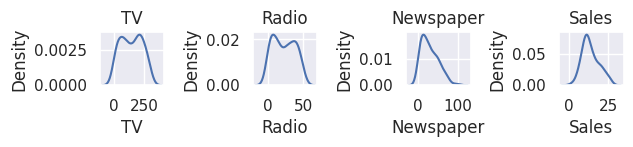

In [ ]:

plt.figure()
for col in train_df.select_dtypes(include = ['number']).columns:
#for col in train_df.columns:
  plt.subplot(4,4,train_df.columns.get_loc(col)+1)
  sns.kdeplot(x=train_df[col])
  plt.title(col)
plt.tight_layout()
plt.show()


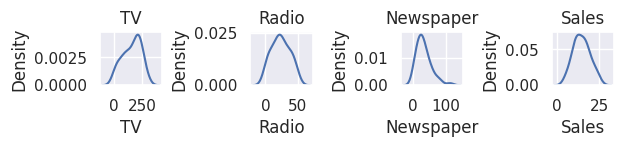

In [ ]:
plt.figure()
for col in validation_df.columns:

  plt.subplot(4,4,validation_df.columns.get_loc(col)+1)
  sns.kdeplot(x=validation_df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

In [9]:
validation_df.head()

,TV,Radio,Newspaper,Sales
58,210.8,49.6,37.7,23.8
40,202.5,22.3,31.6,16.6
34,95.7,1.4,7.4,9.5
102,280.2,10.1,21.4,14.8
184,253.8,21.3,30.0,17.6


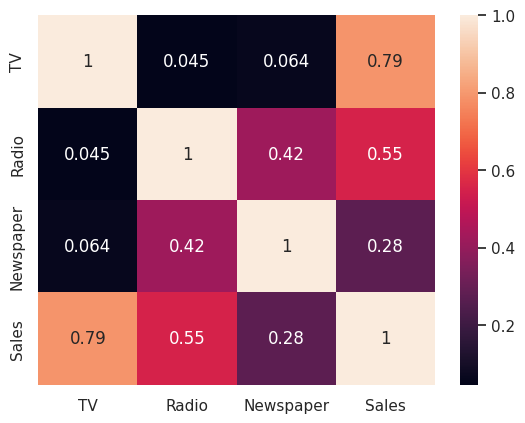

In [ ]:
plt.figure()
#for col in train_df.select_dtypes(include = ['number']).columns:
#for col in train_df.columns:
#  plt.subplot(4,4,train_df.columns.get_loc(col)+1)
sns.heatmap(train_df.corr(),annot=True)
  #plt.title(col)
#plt.tight_layout()
plt.show()

In [10]:
top10= train_df.nlargest(10,'Sales')
top10

,TV,Radio,Newspaper,Sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
98,289.7,42.3,51.2,25.4
36,266.9,43.8,5.0,25.4
147,243.2,49.0,44.3,25.4
128,220.3,49.0,3.2,24.7
17,281.4,39.6,55.8,24.4
61,261.3,42.7,54.7,24.2
101,296.4,36.3,100.9,23.8
55,198.9,49.4,60.0,23.7


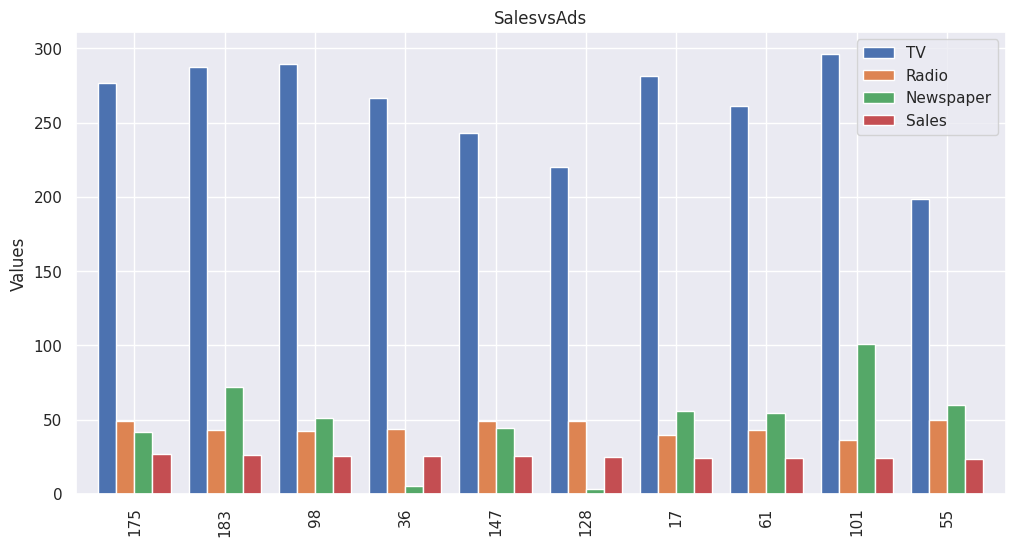

In [ ]:
bar=top10.plot(kind='bar',figsize=(12,6),width=0.8)
bar.set_ylabel('Values')
plt.title('SalesvsAds')
plt.show()

bar=top10.plot(kind='bar',figsize=(12,6),width=0.8)
plt.ylabel('Values')
plt.title('SalesvsAds')
plt.show()

In [ ]:
train_df

,TV,Radio,Newspaper,Sales
98,289.7,42.3,51.2,25.4
123,123.1,34.6,12.4,15.2
119,19.4,16.0,22.3,6.6
53,182.6,46.2,58.7,21.2
33,265.6,20.0,0.3,17.4
...,...,...,...,...
133,219.8,33.5,45.1,19.6
137,273.7,28.9,59.7,20.8
72,26.8,33.0,19.3,8.8
140,73.4,17.0,12.9,10.9


In [ ]:
train_df['Total ads']= train_df['TV']+train_df['Radio']+train_df['Newspaper']
train_df.head(2)

,TV,Radio,Newspaper,Sales,Total ads
98,289.7,42.3,51.2,25.4,383.2
123,123.1,34.6,12.4,15.2,170.1


In [ ]:
top_10_ads= train_df.nlargest(10,'Total ads')
top_10_ads

,TV,Radio,Newspaper,Sales,Total ads
101,296.4,36.3,100.9,23.8,433.6
183,287.6,43.0,71.8,26.2,402.4
98,289.7,42.3,51.2,25.4,383.2
17,281.4,39.6,55.8,24.4,376.8
175,276.9,48.9,41.8,27.0,367.6
30,292.9,28.3,43.2,21.4,364.4
137,273.7,28.9,59.7,20.8,362.3
93,250.9,36.5,72.3,22.2,359.7
61,261.3,42.7,54.7,24.2,358.7
0,230.1,37.8,69.2,22.1,337.1


In [ ]:
#top_10_ads.drop(['Total ads'],axis=1,inplace=True)
train_df.drop(['Total ads'],axis=1,inplace=True)
train_df

,TV,Radio,Newspaper,Sales
98,289.7,42.3,51.2,25.4
123,123.1,34.6,12.4,15.2
119,19.4,16.0,22.3,6.6
53,182.6,46.2,58.7,21.2
33,265.6,20.0,0.3,17.4
...,...,...,...,...
133,219.8,33.5,45.1,19.6
137,273.7,28.9,59.7,20.8
72,26.8,33.0,19.3,8.8
140,73.4,17.0,12.9,10.9


In [11]:
raw_x_train=train_df.drop(['Sales'],axis=1)
raw_x_train

,TV,Radio,Newspaper
98,289.7,42.3,51.2
123,123.1,34.6,12.4
119,19.4,16.0,22.3
53,182.6,46.2,58.7
33,265.6,20.0,0.3
...,...,...,...
133,219.8,33.5,45.1
137,273.7,28.9,59.7
72,26.8,33.0,19.3
140,73.4,17.0,12.9


In [12]:
raw_y_train=train_df['Sales']
raw_y_train

,Sales
98,25.4
123,15.2
119,6.6
53,21.2
33,17.4
...,...
133,19.6
137,20.8
72,8.8
140,10.9


In [13]:
raw_val_x= validation_df.drop(['Sales'],axis=1)
raw_val_x.head(2)

,TV,Radio,Newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6


In [15]:
raw_val_y=validation_df['Sales']
raw_val_y.head(2)

,Sales
58,23.8
40,16.6


In [16]:
#Building the models
# Linear Regression model
linear_model_raw=LinearRegression()
linear_model_raw.fit(raw_x_train,raw_y_train)
raw_y_train_lr=linear_model_raw.predict(raw_x_train)
raw_y_val_lr=linear_model_raw.predict(raw_val_x)


In [18]:
print("Accuracy scores for linear regression model on raw data")
raw_lr_rmse=mean_squared_error(raw_val_y,raw_y_val_lr)
raw_train_lr_r2s=r2_score(raw_y_train,raw_y_train_lr)
raw_val_lr_r2s=r2_score(raw_val_y,raw_y_val_lr)
print("raw_lr_rmse = ",raw_lr_rmse)
print("raw_train_lr_r2s = ",raw_train_lr_r2s)
print("raw_y_val_lr = ",raw_val_lr_r2s)

Accuracy scores for linear regression model on raw data
raw_lr_rmse =  1.9730456202283373
raw_train_lr_r2s =  0.890307557755665
raw_y_val_lr =  0.9156213613792232


In [19]:
#Lasso Regression model

lasso_model_raw=Lasso()
lasso_model_raw.fit(raw_x_train,raw_y_train)
raw_y_train_lasso=lasso_model_raw.predict(raw_x_train)
raw_y_val_lasso=lasso_model_raw.predict(raw_val_x)

In [20]:
print("Accuracy scores for lasso regression(L1) model on raw data")
raw_lasso_rmse=mean_squared_error(raw_val_y,raw_y_val_lasso)
raw_train_lasso_r2s=r2_score(raw_y_train,raw_y_train_lasso)
raw_val_lasso_r2s=r2_score(raw_val_y,raw_y_val_lasso)
print("raw_lasso_rmse = ",raw_lasso_rmse)
print("raw_train_lasso_r2s = ",raw_train_lasso_r2s)
print("raw_y_val_lasso_r2s = ",raw_val_lasso_r2s)

Accuracy scores for lasso regression(L1) model on raw data
raw_lasso_rmse =  2.007667051817513
raw_train_lasso_r2s =  0.890134288627759
raw_y_val_lasso_r2s =  0.9141407522971794


In [21]:
#Ridge Regression model(L2 Regularization)
ridge_model_raw=Ridge()
ridge_model_raw.fit(raw_x_train,raw_y_train)
raw_y_train_ridge=ridge_model_raw.predict(raw_x_train)
raw_y_val_ridge=ridge_model_raw.predict(raw_val_x)

In [22]:
print("Accuracy scores for Ridge regression model on raw data")
raw_ridge_rmse=mean_squared_error(raw_val_y,raw_y_val_ridge)
raw_train_ridge_r2s = r2_score(raw_y_train,raw_y_train_ridge)
raw_val_ridge_r2= r2_score(raw_val_y,raw_y_val_ridge)
print("RMS Error using ridge regression = ",raw_ridge_rmse)
print("r2 score_training = ", raw_train_ridge_r2s)
print("r2 score_testing = ", raw_val_ridge_r2 )

Accuracy scores for Ridge regression model on raw data
RMS Error using ridge regression =  1.9731360610267696
r2 score_training =  0.890307557490011
r2 score_testing =  0.9156174936169327


In [26]:
# Elastic Net Regression (L1 and L2 Regularization)
enet_model_raw=ElasticNet()
enet_model_raw.fit(raw_x_train,raw_y_train)
raw_y_train_enet=enet_model_raw.predict(raw_x_train)
raw_y_val_enet=enet_model_raw.predict(raw_val_x)


In [27]:
print("Accuracy scores for Elasticnet regression model on raw data")
raw_enet_rmse=mean_squared_error(raw_val_y,raw_y_val_enet)
raw_train_enet_r2s = r2_score(raw_y_train,raw_y_train_enet)
raw_val_enet_r2= r2_score(raw_val_y,raw_y_val_enet)
print("RMS Error using Elasticnet regression = ",raw_enet_rmse)
print("r2 score_training = ", raw_train_enet_r2s)
print("r2 score_testing = ", raw_val_enet_r2 )

Accuracy scores for Elasticnet regression model on raw data
RMS Error using Elasticnet regression =  1.9963873026756227
r2 score_training =  0.8902510395505827
r2 score_testing =  0.9146231384451826


In [29]:
#Random forest regression
rf_model_raw=RandomForestRegressor()
rf_model_raw.fit(raw_x_train,raw_y_train)
raw_y_train_rf=rf_model_raw.predict(raw_x_train)
raw_y_val_rf=rf_model_raw.predict(raw_val_x)


In [30]:
print("Accuracy scores for Random forest regression model on raw data")
raw_rf_rmse=mean_squared_error(raw_val_y,raw_y_val_rf)
raw_train_rf_r2s = r2_score(raw_y_train,raw_y_train_rf)
raw_val_rf_r2= r2_score(raw_val_y,raw_y_val_rf)
print("RMS Error using Elasticnet regression = ",raw_rf_rmse)
print("r2 score_training = ", raw_train_rf_r2s)
print("r2 score_testing = ", raw_val_rf_r2 )

Accuracy scores for Random forest regression model on raw data
RMS Error using Elasticnet regression =  0.39360609999999857
r2 score_training =  0.9967222187353
r2 score_testing =  0.9831671672817227


In [31]:
final_model = rf_model_raw
finlename= '04_Sales_Predictions.sav'
pickle.dump(final_model,open(finlename,'wb')) #dump means store

In [ ]:
out_df=sales_df

In [32]:
#Spliting dependent and independent variables
x_final=sales.drop('Sales',axis=1)
y_final=sales['Sales']

y_final.head(2)

,Sales
0,22.1
1,10.4


In [33]:
x_final.head(2)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1


In [35]:
y_predicted=final_model.predict(x_final)
final_result=pd.DataFrame({'Actual':y_final,'Predicted':y_predicted})
final_result.head(10)

,Actual,Predicted
0,22.1,21.744
1,10.4,10.739
2,9.3,8.887
3,18.5,18.369
4,12.9,13.860
5,7.2,7.266
6,11.8,11.484
7,13.2,12.997
8,4.8,5.044
9,10.6,10.932


In [41]:
final_y_pred = pd.DataFrame(y_predicted)
final_y_pred = final_y_pred.rename(columns={0: 'Predicted_Sales'})
final_y_pred.head(2)


,Predicted_Sales
0,21.744
1,10.739


In [47]:
final_result1= pd.concat([sales,final_y_pred],axis=1)
final_result1.head(10)

,TV,Radio,Newspaper,Sales,Predicted_Sales
0,230.1,37.8,69.2,22.1,21.744
1,44.5,39.3,45.1,10.4,10.739
2,17.2,45.9,69.3,9.3,8.887
3,151.5,41.3,58.5,18.5,18.369
4,180.8,10.8,58.4,12.9,13.860
5,8.7,48.9,75.0,7.2,7.266
6,57.5,32.8,23.5,11.8,11.484
7,120.2,19.6,11.6,13.2,12.997
8,8.6,2.1,1.0,4.8,5.044
9,199.8,2.6,21.2,10.6,10.932


In [44]:
sales.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [48]:
pwd

'/content'

In [52]:
# prompt: create a code here to pass the TV, radio, newspaper value from user and then run

#tv_ads = float(input("Enter the amount spent on TV advertisements: "))
#radio_ads = float(input("Enter the amount spent on radio advertisements: "))
#newspaper_ads = float(input("Enter the amount spent on newspaper advertisements: "))

# Create a DataFrame for prediction
import pandas as pd
TV=66
radio=44
newspaper=24
new_data = pd.DataFrame({'TV': [TV], 'Radio': [radio], 'Newspaper': [newspaper]})

# Load the saved model
loaded_model = pickle.load(open('04_Sales_Predictions.sav', 'rb'))

# Make predictions
predicted_sales = loaded_model.predict(new_data)

print("Predicted Sales:", predicted_sales[0])


Predicted Sales: 12.546999999999993


In [55]:
final_result1.to_csv('04_Predicted_Sales.csv')
